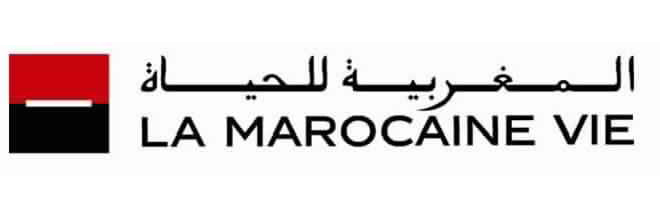

In [278]:
import pandas as pd 
#import mathplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
from sklearn.preprocessing import StandardScaler

In [279]:
data=pd.read_csv("MASI_2.csv",parse_dates=True, index_col=0)

data

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2002-01-03,3684.51,3694.96,3640.00,3640.00,0,MAD
2002-01-04,3641.08,3671.50,3640.00,3671.50,0,MAD
2002-01-07,3670.56,3674.71,3662.56,3667.30,0,MAD
2002-01-08,3655.56,3657.54,3639.32,3641.65,0,MAD
2002-01-09,3637.89,3645.03,3627.77,3644.19,0,MAD
...,...,...,...,...,...,...
2022-05-16,12682.21,12738.15,12648.59,12682.77,0,MAD
2022-05-17,12682.77,12733.07,12681.66,12716.65,0,MAD
2022-05-18,12716.65,12749.42,12672.62,12679.96,0,MAD


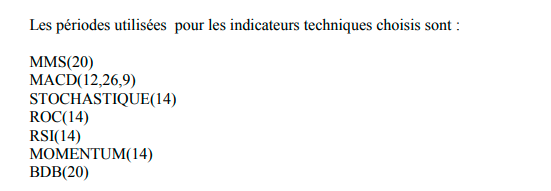

In [280]:
sma10 = df.ta.sma(length=10)
SMA=pd.DataFrame(sma10)
SMA

,SMA_10
Date,
2002-01-03,NaN
2002-01-04,NaN
2002-01-07,NaN
2002-01-08,NaN
2002-01-09,NaN
...,...
2022-05-16,12869.139
2022-05-17,12827.139
2022-05-18,12780.746


In [281]:
bbands=df.ta.bbands()
BB=pd.DataFrame(bbands)
BL=BB["BBB_5_2.0"]

In [282]:
macd=df.ta.macd()
macd=pd.DataFrame(macd)
macd=macd["MACD_12_26_9"]

In [283]:
RSI=df.ta.rsi()
rsi=pd.DataFrame(RSI)
rsi

,RSI_14
Date,
2002-01-03,NaN
2002-01-04,NaN
2002-01-07,NaN
2002-01-08,NaN
2002-01-09,NaN
...,...
2022-05-16,34.756526
2022-05-17,37.551468
2022-05-18,35.764656


In [284]:
roc=df.ta.roc()
roc=pd.DataFrame(roc)
roc


,ROC_10
Date,
2002-01-03,NaN
2002-01-04,NaN
2002-01-07,NaN
2002-01-08,NaN
2002-01-09,NaN
...,...
2022-05-16,-3.440292
2022-05-17,-3.197162
2022-05-18,-3.529625


In [285]:
mom=df.ta.mom(length=10)
mom=pd.DataFrame(mom)
mom

,MOM_10
Date,
2002-01-03,NaN
2002-01-04,NaN
2002-01-07,NaN
2002-01-08,NaN
2002-01-09,NaN
...,...
2022-05-16,-451.87
2022-05-17,-420.00
2022-05-18,-463.93


In [287]:
stoch=df.ta.stoch( k=14, d=3, smooth_k=3)
stoch=pd.DataFrame(stoch)
stoch
stoch=stoch["STOCHk_14_3_3"]

In [288]:
data_IS=pd.concat([macd,stoch,mom,RSI,SMA,roc,BL],axis=1)
data_IS

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC_10,BBB_5_2.0
Date,,,,,,,
2002-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-09,NaN,NaN,NaN,NaN,NaN,NaN,1.487083
...,...,...,...,...,...,...,...
2022-05-16,-75.920155,12.522124,-451.87,34.756526,12869.139,-3.440292,1.296902
2022-05-17,-79.715526,20.516124,-420.00,37.551468,12827.139,-3.197162,1.547484
2022-05-18,-84.707505,20.488464,-463.93,35.764656,12780.746,-3.529625,1.551148


In [289]:
data_IS=data_IS.dropna()
data_IS

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC_10,BBB_5_2.0
Date,,,,,,,
2002-02-08,-4.893728,13.378683,-64.05,35.023643,3667.719,-1.733461,1.950378
2002-02-11,-8.829266,6.236266,-82.00,28.739497,3659.519,-2.222367,2.278811
2002-02-12,-9.853643,18.264537,-51.52,40.875801,3654.367,-1.398544,1.866047
2002-02-13,-10.753725,23.921693,-42.67,40.088134,3650.100,-1.161926,1.123814
2002-02-14,-11.877223,32.126890,-52.42,38.052419,3644.858,-1.426270,1.000496
...,...,...,...,...,...,...,...
2022-05-16,-75.920155,12.522124,-451.87,34.756526,12869.139,-3.440292,1.296902
2022-05-17,-79.715526,20.516124,-420.00,37.551468,12827.139,-3.197162,1.547484
2022-05-18,-84.707505,20.488464,-463.93,35.764656,12780.746,-3.529625,1.551148


In [290]:
from sklearn.preprocessing import MinMaxScaler

In [291]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data_IS)
print(scaled)

[[0.61169712 0.13378683 0.66539304 ... 0.05849386 0.56470539 0.06525917]
 [0.60850197 0.06236266 0.66117245 ... 0.0577972  0.5525013  0.07676191]
 [0.6076703  0.18264537 0.66833923 ... 0.05735949 0.5730656  0.06230564]
 ...
 [0.54689861 0.20488464 0.57136912 ... 0.83272202 0.51986946 0.05127692]
 [0.54451804 0.20439805 0.57663839 ... 0.82897093 0.5239833  0.0126252 ]
 [0.53999627 0.15481264 0.58065912 ... 0.82536513 0.52679932 0.02884483]]


In [27]:
data_IS_SCALED=pd.DataFrame(scaled)
data_IS_SCALED


,0,1,2,3,4,5,6
0,0.611697,0.133787,0.665393,0.334410,0.058494,0.564705,0.065259
1,0.608502,0.062363,0.661172,0.262370,0.057797,0.552501,0.076762
2,0.607670,0.182645,0.668339,0.401497,0.057359,0.573066,0.062306
3,0.606940,0.239217,0.670420,0.392468,0.056997,0.578972,0.036310
4,0.606027,0.321269,0.668128,0.369131,0.056552,0.572374,0.031991
...,...,...,...,...,...,...,...
5051,0.554033,0.125221,0.574205,0.331347,0.840232,0.522099,0.042372
5052,0.550951,0.205161,0.581698,0.363388,0.836663,0.528168,0.051149
5053,0.546899,0.204885,0.571369,0.342904,0.832722,0.519869,0.051277
5054,0.544518,0.204398,0.576638,0.343079,0.828971,0.523983,0.012625


In [292]:
data_IS.describe()

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC_10,BBB_5_2.0
count,5056.000000,5056.000000,5056.000000,5056.000000,5056.000000,5056.000000,5056.000000
mean,12.806421,56.491480,17.840245,53.001293,9598.092942,0.290289,2.266778
std,113.178798,31.341189,290.425801,15.922023,3115.691259,2.976808,2.101451
min,-758.334851,0.000000,-2893.940000,5.852657,2979.219000,-24.356012,0.087059
25%,-43.357549,27.922139,-108.987500,41.494772,8775.648500,-1.189069,1.034439
50%,12.807714,60.462078,19.505000,52.997866,10327.320500,0.255849,1.628909
75%,72.782939,86.273330,150.552500,64.443558,11751.963500,1.690847,2.771458
max,473.387687,100.000000,1359.020000,93.083972,14749.686000,15.704790,28.639660


In [54]:

#minmax_scaling(data_IS["STOCHk_14_3_3"], columns=[0, 1])

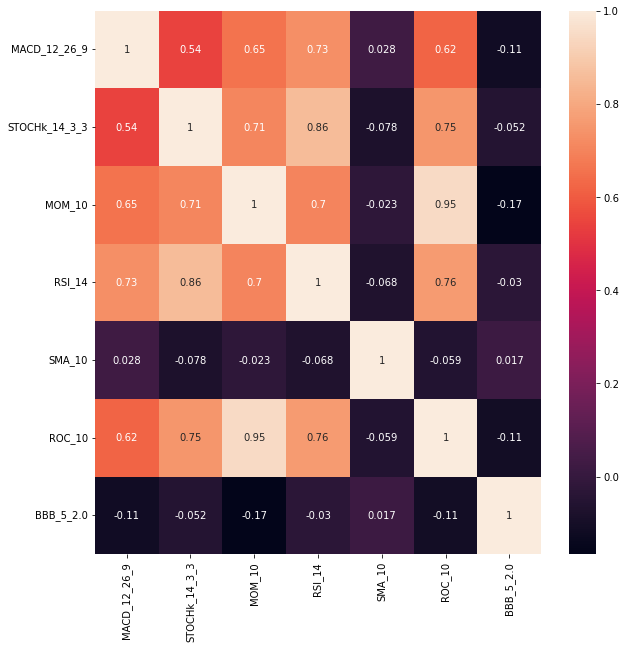

In [294]:
corr_data = data_IS.corr(method='pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(corr_data, annot=True)
plt.show()

In [295]:
from sklearn.decomposition import PCA
#affichage des paramètres
acp= PCA(n_components=7)

In [297]:
#calculs
coord = acp.fit_transform(data_IS)
#nombre de composantes calculées
print(acp.n_components_) 


7


In [298]:
#variance expliquée
print(acp.explained_variance_)


[9.70759481e+06 9.09353403e+04 6.83387352e+03 5.30685204e+02
 3.80494883e+01 4.19714341e+00 7.14107762e-01]


In [299]:
#valeur corrigée
eigval = (7-1)/7*acp.explained_variance_
print(eigval)

[8.32079555e+06 7.79445774e+04 5.85760587e+03 4.54873032e+02
 3.26138471e+01 3.59755150e+00 6.12092368e-01]


In [300]:
print(acp.explained_variance_ratio_)

[9.89971091e-01 9.27349768e-03 6.96911785e-04 5.41187618e-05
 3.88024987e-06 4.28020609e-07 7.28240161e-08]


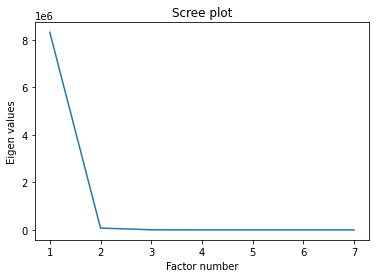

In [301]:
plt.plot(np.arange(1,8),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


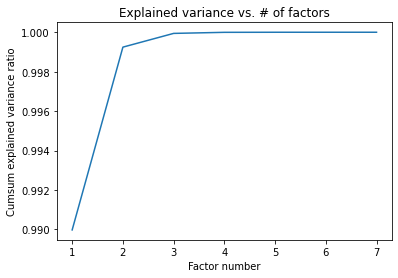

In [302]:
#cumul de variance expliquée
plt.plot(np.arange(1,8),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [303]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(7,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [304]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

     Val.Propre    Seuils
0  8.320796e+06  2.592857
1  7.794458e+04  1.592857
2  5.857606e+03  1.092857
3  4.548730e+02  0.759524
4  3.261385e+01  0.509524
5  3.597551e+00  0.309524
6  6.120924e-01  0.142857


In [187]:
#INTERFACE 
loadings_df = loadings_df.set_index('variable')
loadings_df

,Composante principale n°1,Composante principale n°2,Composante principale n°3,Composante principale n°4,Composante principale n°5,Composante principale n°6
variable,,,,,,
MACD_12_26_9,-0.157994,-0.046111,-0.586032,-0.079662,-0.143122,-0.770761
STOCHk_14_3_3,-0.841139,-0.085136,0.495917,-0.051456,-0.010564,-0.190742
MOM_10,-0.140099,-0.024670,-0.179102,-0.232185,-0.570151,0.209184
RSI_14,-0.457980,-0.051601,-0.583231,0.276761,0.432199,0.422877
SMA_10,0.109613,-0.993487,0.022575,0.000563,0.010411,0.018287
ROC_10,-0.161202,-0.018247,-0.179637,-0.168592,-0.559597,0.373573
BBB_5_2.0,0.012186,-0.002212,0.074948,0.912182,-0.392784,-0.084096


In [305]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [189]:
"{:.3%}".format(pca_out.explained_variance_ratio_[0])

'59.601%'

In [190]:
var_axe_1=pca_out.explained_variance_ratio_[0]
var_axe_1

0.5960077136075178

In [191]:
"{:.3%}".format(pca_out.explained_variance_ratio_[1])

'30.731%'

In [192]:
var_axe_2=pca_out.explained_variance_ratio_[1]
var_axe_2


0.3073103569588891

In [193]:
"{:.3%}".format(pca_out.explained_variance_ratio_[2])

'4.448%'

In [194]:
#variance 
var_axe_3=pca_out.explained_variance_ratio_[2]
var_axe_3

0.044480527533314516

In [195]:
var_axe_4=pca_out.explained_variance_ratio_[3]
var_axe_4

0.025493166338946455

In [196]:
var_axe_5=pca_out.explained_variance_ratio_[4]
var_axe_5

0.015420910873707302

In [197]:
var_axe_6=pca_out.explained_variance_ratio_[5]
var_axe_6

0.010306550588930099

In [198]:
#%INTERFACE 
loadings_df**2

,Composante principale n°1,Composante principale n°2,Composante principale n°3,Composante principale n°4,Composante principale n°5,Composante principale n°6
variable,,,,,,
MACD_12_26_9,0.024962,0.002126,0.343433,6.346063e-03,0.020484,0.594072
STOCHk_14_3_3,0.707515,0.007248,0.245934,2.647703e-03,0.000112,0.036383
MOM_10,0.019628,0.000609,0.032078,5.390970e-02,0.325073,0.043758
RSI_14,0.209746,0.002663,0.340159,7.659670e-02,0.186796,0.178825
SMA_10,0.012015,0.987017,0.000510,3.172924e-07,0.000108,0.000334
ROC_10,0.025986,0.000333,0.032270,2.842316e-02,0.313148,0.139556
BBB_5_2.0,0.000148,0.000005,0.005617,8.320763e-01,0.154279,0.007072


In [136]:
"{:.3%}".format(pca_out.explained_variance_ratio_[0]+pca_out.explained_variance_ratio_[1]+pca_out.explained_variance_ratio_[3])

'92.881%'

# Construction de l'indicateurs syntetique moyennant une ACP 

### Calcul du carée de la matrice 

In [199]:
carre=loadings_df**2

### Calcul de la somme des valeurs selon chaque composante 

In [200]:
#COLONE 
Somme_Composante_1=carre["Composante principale n°1"].sum()
Somme_Composante_2=carre["Composante principale n°2"].sum()
Somme_Composante_3=carre["Composante principale n°3"].sum()
Somme_Composante_4=carre["Composante principale n°4"].sum()
Somme_Composante_5=carre["Composante principale n°5"].sum()
Somme_Composante_6=carre["Composante principale n°6"].sum()
#Somme_Composante_7=carre["Composante principale n°7"].sum()


### Construction de 6 colonnes contenant les Carrées sur les sommes 

In [201]:
#INTERFACE
carre["PC1_SUR_somme_1"]=carre["Composante principale n°1"]/Somme_Composante_1
carre["PC1_SUR_somme_1"]
carre["PC2_SUR_somme_2"]=carre["Composante principale n°2"]/Somme_Composante_2
carre["PC2_SUR_somme_2"]
carre["PC3_SUR_somme_3"]=carre["Composante principale n°3"]/Somme_Composante_3
carre["PC3_SUR_somme_3"]
carre["PC4_SUR_somme_4"]=carre["Composante principale n°4"]/Somme_Composante_4
carre["PC4_SUR_somme_4"]
carre["PC5_SUR_somme_5"]=carre["Composante principale n°5"]/Somme_Composante_5
carre["PC5_SUR_somme_5"]
carre["PC6_SUR_somme_6"]=carre["Composante principale n°6"]/Somme_Composante_6
carre["PC6_SUR_somme_6"]
"""
carre["PC7_SUR_somme_7"]=carre["Composante principale n°7"]/Somme_Composante_7
carre["PC7_SUR_somme_7"]
carre
"""


'\ncarre["PC7_SUR_somme_7"]=carre["Composante principale n°7"]/Somme_Composante_7\ncarre["PC7_SUR_somme_7"]\ncarre\n'

### S'asurer que les sommes valent 1 

In [202]:
carre["Composante principale n°1"].sum()
carre["Composante principale n°2"].sum()
carre["Composante principale n°3"].sum()
carre["Composante principale n°4"].sum()
carre["Composante principale n°5"].sum()
carre["Composante principale n°6"].sum()
"""
carre["Composante principale n°7"].sum()
"""
carre["Composante principale n°6"].sum()

1.0000000000000004

# Dans ce qui suit nous allons retenir 3 AXES pour construire IS  

> Cheminement de la construction :

&nbsp;

** creer une colonne IS **



In [203]:
carre["var_fois_pc_1"]=var_axe_1*carre["PC1_SUR_somme_1"]
carre["var_fois_pc_2"]=var_axe_2*carre["PC2_SUR_somme_2"]
carre["var_fois_pc_3"]=var_axe_3*carre["PC3_SUR_somme_3"]
carre["var_fois_pc_4"]=var_axe_4*carre["PC4_SUR_somme_4"]
carre["var_fois_pc_5"]=var_axe_5*carre["PC5_SUR_somme_5"]
carre["var_fois_pc_6"]=var_axe_6*carre["PC6_SUR_somme_6"]
carre

,Composante principale n°1,Composante principale n°2,Composante principale n°3,Composante principale n°4,Composante principale n°5,Composante principale n°6,PC1_SUR_somme_1,PC2_SUR_somme_2,PC3_SUR_somme_3,PC4_SUR_somme_4,PC5_SUR_somme_5,PC6_SUR_somme_6,var_fois_pc_1,var_fois_pc_2,var_fois_pc_3,var_fois_pc_4,var_fois_pc_5,var_fois_pc_6
variable,,,,,,,,,,,,,,,,,,
MACD_12_26_9,0.024962,0.002126,0.343433,6.346063e-03,0.020484,0.594072,0.024962,0.002126,0.343433,6.346063e-03,0.020484,0.594072,0.014878,0.000653,0.015276,1.617812e-04,0.000316,0.006123
STOCHk_14_3_3,0.707515,0.007248,0.245934,2.647703e-03,0.000112,0.036383,0.707515,0.007248,0.245934,2.647703e-03,0.000112,0.036383,0.421684,0.002227,0.010939,6.749833e-05,0.000002,0.000375
MOM_10,0.019628,0.000609,0.032078,5.390970e-02,0.325073,0.043758,0.019628,0.000609,0.032078,5.390970e-02,0.325073,0.043758,0.011698,0.000187,0.001427,1.374329e-03,0.005013,0.000451
RSI_14,0.209746,0.002663,0.340159,7.659670e-02,0.186796,0.178825,0.209746,0.002663,0.340159,7.659670e-02,0.186796,0.178825,0.125010,0.000818,0.015130,1.952693e-03,0.002881,0.001843
SMA_10,0.012015,0.987017,0.000510,3.172924e-07,0.000108,0.000334,0.012015,0.987017,0.000510,3.172924e-07,0.000108,0.000334,0.007161,0.303320,0.000023,8.088789e-09,0.000002,0.000003
ROC_10,0.025986,0.000333,0.032270,2.842316e-02,0.313148,0.139556,0.025986,0.000333,0.032270,2.842316e-02,0.313148,0.139556,0.015488,0.000102,0.001435,7.245964e-04,0.004829,0.001438
BBB_5_2.0,0.000148,0.000005,0.005617,8.320763e-01,0.154279,0.007072,0.000148,0.000005,0.005617,8.320763e-01,0.154279,0.007072,0.000089,0.000002,0.000250,2.121226e-02,0.002379,0.000073


In [204]:
Tableau_pour_IS=carre[["var_fois_pc_1","var_fois_pc_2","var_fois_pc_3","var_fois_pc_4","var_fois_pc_5","var_fois_pc_6"]]
Tableau_pour_IS


,var_fois_pc_1,var_fois_pc_2,var_fois_pc_3,var_fois_pc_4,var_fois_pc_5,var_fois_pc_6
variable,,,,,,
MACD_12_26_9,0.014878,0.000653,0.015276,1.617812e-04,0.000316,0.006123
STOCHk_14_3_3,0.421684,0.002227,0.010939,6.749833e-05,0.000002,0.000375
MOM_10,0.011698,0.000187,0.001427,1.374329e-03,0.005013,0.000451
RSI_14,0.125010,0.000818,0.015130,1.952693e-03,0.002881,0.001843
SMA_10,0.007161,0.303320,0.000023,8.088789e-09,0.000002,0.000003
ROC_10,0.015488,0.000102,0.001435,7.245964e-04,0.004829,0.001438
BBB_5_2.0,0.000089,0.000002,0.000250,2.121226e-02,0.002379,0.000073


In [205]:
IS = Tableau_pour_IS.sum(axis = 1)
IS

variable
MACD_12_26_9     0.037408
STOCHk_14_3_3    0.435295
MOM_10           0.020150
RSI_14           0.147635
SMA_10           0.310509
ROC_10           0.024018
BBB_5_2.0        0.024004
dtype: float64

In [206]:
poids=pd.DataFrame({"IS_Acp_poids": [0.037408,0.435295,0.020150,0.147635,0.310509,0.024018,0.024004]})
poids

,IS_Acp_poids
0,0.037408
1,0.435295
2,0.020150
3,0.147635
4,0.310509
5,0.024018
6,0.024004


In [207]:
scaled_data__=pd.DataFrame(scaled_data)

In [146]:
scaled_data__.columns

RangeIndex(start=0, stop=7, step=1)

In [208]:
scaled_data__.rename(columns = { '0': 'MACD_12_26_9', '1': 'P-STOCHk_14_3_3' },inplace=True)
scaled_data__.columns


Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [209]:
scaled_data__.rename(columns={scaled_data__.columns[0]:'MACD_12_26_9'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[1]:'STOCHk_14_3_3'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[2]:'MOM_10'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[3]:'RSI_14'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[4]:'SMA_10'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[5]:'ROC'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[6]:'BBB_5_2.0'}, inplace=True)
scaled_data__


,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC,BBB_5_2.0
0,0.611697,0.133787,0.665393,0.334410,0.058494,0.564705,0.065259
1,0.608502,0.062363,0.661172,0.262370,0.057797,0.552501,0.076762
2,0.607670,0.182645,0.668339,0.401497,0.057359,0.573066,0.062306
3,0.606940,0.239217,0.670420,0.392468,0.056997,0.578972,0.036310
4,0.606027,0.321269,0.668128,0.369131,0.056552,0.572374,0.031991
...,...,...,...,...,...,...,...
5051,0.554033,0.125221,0.574205,0.331347,0.840232,0.522099,0.042372
5052,0.550951,0.205161,0.581698,0.363388,0.836663,0.528168,0.051149
5053,0.546899,0.204885,0.571369,0.342904,0.832722,0.519869,0.051277
5054,0.544518,0.204398,0.576638,0.343079,0.828971,0.523983,0.012625


In [210]:
poids

,IS_Acp_poids
0,0.037408
1,0.435295
2,0.020150
3,0.147635
4,0.310509
5,0.024018
6,0.024004


In [211]:
scaled_data__["MACD_12_26_9_p"]=scaled_data__["MACD_12_26_9"]*0.037408
scaled_data__
scaled_data__["STOCHk_14_3_3_p"]=scaled_data__["STOCHk_14_3_3"]*0.435295
scaled_data__["MOM_10_p"]=scaled_data__["MOM_10"]*0.020150
scaled_data__["RSI_14_p"]=scaled_data__["RSI_14"]*0.147635
scaled_data__["SMA_10_p"]=scaled_data__["SMA_10"]*0.310509
scaled_data__["ROC_p"]=scaled_data__["ROC"]*0.024004
scaled_data__["BBB_5_2.0_p"]=scaled_data__["BBB_5_2.0"]*0.024018
scaled_data__

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC,BBB_5_2.0,MACD_12_26_9_p,STOCHk_14_3_3_p,MOM_10_p,RSI_14_p,SMA_10_p,ROC_p,BBB_5_2.0_p
0,0.611697,0.133787,0.665393,0.334410,0.058494,0.564705,0.065259,0.022882,0.058237,0.013408,0.049371,0.018163,0.013555,0.001567
1,0.608502,0.062363,0.661172,0.262370,0.057797,0.552501,0.076762,0.022763,0.027146,0.013323,0.038735,0.017947,0.013262,0.001844
2,0.607670,0.182645,0.668339,0.401497,0.057359,0.573066,0.062306,0.022732,0.079505,0.013467,0.059275,0.017811,0.013756,0.001496
3,0.606940,0.239217,0.670420,0.392468,0.056997,0.578972,0.036310,0.022704,0.104130,0.013509,0.057942,0.017698,0.013898,0.000872
4,0.606027,0.321269,0.668128,0.369131,0.056552,0.572374,0.031991,0.022670,0.139847,0.013463,0.054497,0.017560,0.013739,0.000768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0.554033,0.125221,0.574205,0.331347,0.840232,0.522099,0.042372,0.020725,0.054508,0.011570,0.048918,0.260900,0.012532,0.001018
5052,0.550951,0.205161,0.581698,0.363388,0.836663,0.528168,0.051149,0.020610,0.089306,0.011721,0.053649,0.259792,0.012678,0.001228
5053,0.546899,0.204885,0.571369,0.342904,0.832722,0.519869,0.051277,0.020458,0.089185,0.011513,0.050625,0.258568,0.012479,0.001232
5054,0.544518,0.204398,0.576638,0.343079,0.828971,0.523983,0.012625,0.020369,0.088973,0.011619,0.050650,0.257403,0.012578,0.000303


In [102]:
data.iloc[5056:5081]

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-04-14,12971.89,12979.35,12952.66,12971.89,0,MAD
2022-04-15,12971.89,12999.31,12948.57,12999.31,0,MAD
2022-04-18,12999.31,13046.29,12990.96,13038.92,0,MAD
2022-04-19,13038.44,13052.07,13000.49,13052.07,0,MAD
2022-04-20,13052.07,13084.59,13027.26,13063.73,0,MAD
2022-04-21,13063.73,13115.11,13050.11,13096.87,0,MAD
2022-04-22,13096.87,13169.67,13096.87,13169.67,0,MAD
2022-04-25,13169.67,13183.37,13130.45,13167.39,0,MAD
2022-04-26,13167.39,13167.39,13098.20,13106.89,0,MAD


In [151]:
data.drop(data.iloc[5056:5081], axis=0, inplace=True)
data

KeyError: "['Open' 'High' 'Low' 'Close' 'Volume' 'Currency'] not found in axis"

In [214]:
scaled_data__=scaled_data__.set_index(data_IS.index)

In [215]:
scaled_data__

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC,BBB_5_2.0,MACD_12_26_9_p,STOCHk_14_3_3_p,MOM_10_p,RSI_14_p,SMA_10_p,ROC_p,BBB_5_2.0_p
Date,,,,,,,,,,,,,,
2002-02-08,0.611697,0.133787,0.665393,0.334410,0.058494,0.564705,0.065259,0.022882,0.058237,0.013408,0.049371,0.018163,0.013555,0.001567
2002-02-11,0.608502,0.062363,0.661172,0.262370,0.057797,0.552501,0.076762,0.022763,0.027146,0.013323,0.038735,0.017947,0.013262,0.001844
2002-02-12,0.607670,0.182645,0.668339,0.401497,0.057359,0.573066,0.062306,0.022732,0.079505,0.013467,0.059275,0.017811,0.013756,0.001496
2002-02-13,0.606940,0.239217,0.670420,0.392468,0.056997,0.578972,0.036310,0.022704,0.104130,0.013509,0.057942,0.017698,0.013898,0.000872
2002-02-14,0.606027,0.321269,0.668128,0.369131,0.056552,0.572374,0.031991,0.022670,0.139847,0.013463,0.054497,0.017560,0.013739,0.000768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,0.554033,0.125221,0.574205,0.331347,0.840232,0.522099,0.042372,0.020725,0.054508,0.011570,0.048918,0.260900,0.012532,0.001018
2022-05-17,0.550951,0.205161,0.581698,0.363388,0.836663,0.528168,0.051149,0.020610,0.089306,0.011721,0.053649,0.259792,0.012678,0.001228
2022-05-18,0.546899,0.204885,0.571369,0.342904,0.832722,0.519869,0.051277,0.020458,0.089185,0.011513,0.050625,0.258568,0.012479,0.001232


In [217]:
scaled_data__.columns

Index(['MACD_12_26_9', 'STOCHk_14_3_3', 'MOM_10', 'RSI_14', 'SMA_10', 'ROC',
       'BBB_5_2.0', 'MACD_12_26_9_p', 'STOCHk_14_3_3_p', 'MOM_10_p',
       'RSI_14_p', 'SMA_10_p', 'ROC_p', 'BBB_5_2.0_p'],
      dtype='object')

In [219]:
scaled_data__p=scaled_data__[["MACD_12_26_9_p","STOCHk_14_3_3_p","MOM_10_p","RSI_14_p","SMA_10_p","ROC_p","BBB_5_2.0_p"]]

In [220]:
scaled_data__p["IS_final"]=scaled_data__p.sum(axis=1)

C:\Users\pc\AppData\Local\Temp/ipykernel_18168/1744137866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data__p["IS_final"]=scaled_data__p.sum(axis=1)


In [221]:
scaled_data__p

,MACD_12_26_9_p,STOCHk_14_3_3_p,MOM_10_p,RSI_14_p,SMA_10_p,ROC_p,BBB_5_2.0_p,IS_final
Date,,,,,,,,
2002-02-08,0.022882,0.058237,0.013408,0.049371,0.018163,0.013555,0.001567,0.177183
2002-02-11,0.022763,0.027146,0.013323,0.038735,0.017947,0.013262,0.001844,0.135019
2002-02-12,0.022732,0.079505,0.013467,0.059275,0.017811,0.013756,0.001496,0.208041
2002-02-13,0.022704,0.104130,0.013509,0.057942,0.017698,0.013898,0.000872,0.230753
2002-02-14,0.022670,0.139847,0.013463,0.054497,0.017560,0.013739,0.000768,0.262544
...,...,...,...,...,...,...,...,...
2022-05-16,0.020725,0.054508,0.011570,0.048918,0.260900,0.012532,0.001018,0.410172
2022-05-17,0.020610,0.089306,0.011721,0.053649,0.259792,0.012678,0.001228,0.448984
2022-05-18,0.020458,0.089185,0.011513,0.050625,0.258568,0.012479,0.001232,0.444060


<AxesSubplot:xlabel='Date', ylabel='IS_final'>

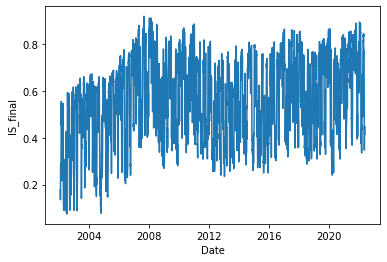

In [224]:
sns.lineplot(data=scaled_data__p, x="Date", y="IS_final")

In [256]:
data.shape

(5081, 6)

In [259]:
scaled_data__p.shape

(5056, 8)

In [275]:
Test_datascaled=scaled_data__p.iloc[4900:5000]
t=Test_datascaled.index
TEST_data=data.loc[t]


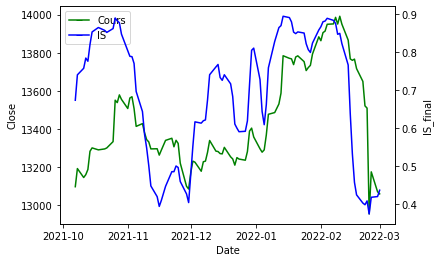

In [277]:
from matplotlib.lines import Line2D
    
g = sns.lineplot(data=TEST_data.Close, color="g")
sns.lineplot(data=Test_datascaled.IS_final, color="b", ax=g.axes.twinx())
g.legend(handles=[Line2D([], [], marker='_', color="g", label='Cours'), Line2D([], [], marker='_', color="b", label='IS')])


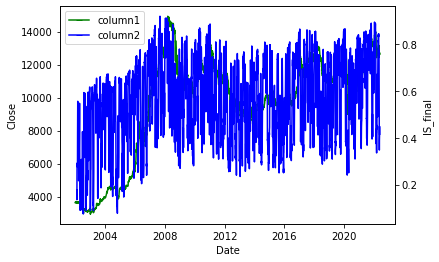

In [243]:
from matplotlib.lines import Line2D
    
g = sns.lineplot(data=data.Close, color="g")
sns.lineplot(data=scaled_data__p.IS_final, color="b", ax=g.axes.twinx())
g.legend(handles=[Line2D([], [], marker='_', color="g", label='column1'), Line2D([], [], marker='_', color="b", label='column2')])


_____________________